# ***Auto Trader Car Price Prediction***

### Importing the libraries

In [754]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [755]:
df = pd.read_csv('/content/adverts.csv')

## **1. Data/Domain Understanding and Explorations**

### Inspection of data

In [756]:
df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [757]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [758]:
df.shape

(402005, 12)

In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [760]:
df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [761]:
df.isnull().sum()

,0
public_reference,0
mileage,127
reg_code,31857
standard_colour,5378
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,33311
price,0
body_type,837


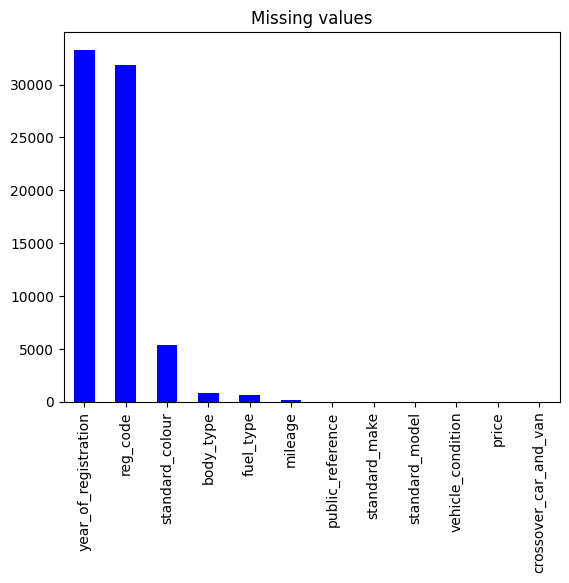

In [762]:
df.isnull().sum().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Missing values')
plt.show()

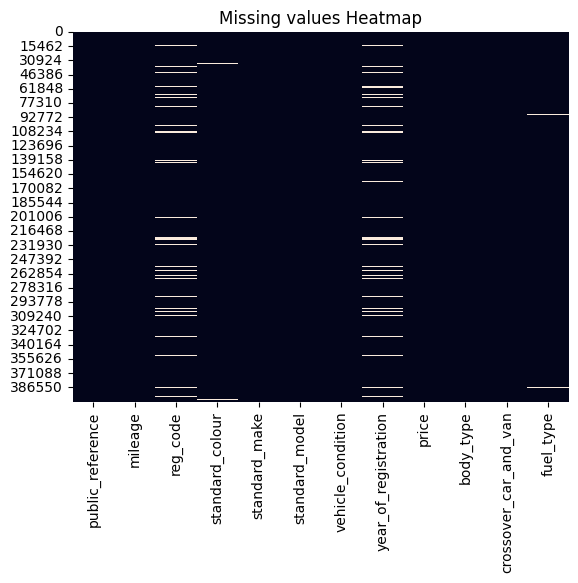

In [763]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values Heatmap')
plt.show()

In [764]:
df.duplicated().sum()

0

### Initial Exploration of features (based on category of data)

In [765]:
from pandas.api.types import is_numeric_dtype, is_categorical_dtype

##### Numeric Features

In [766]:
numeric_features = [col for col in df.columns if is_numeric_dtype(df[col])]
print(f"\nNumeric Features: {numeric_features}")


Numeric Features: ['public_reference', 'mileage', 'year_of_registration', 'price', 'crossover_car_and_van']


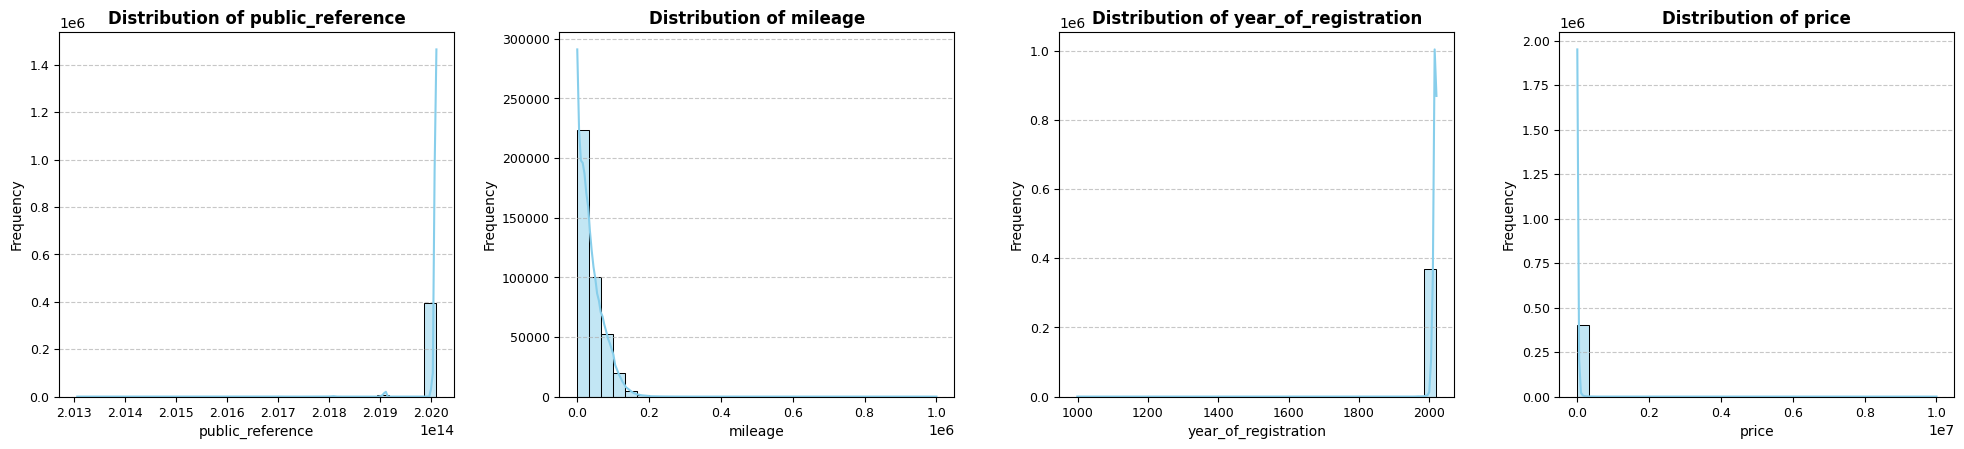

In [767]:
cols = 4
rows = 1
fig, axes = plt.subplots(rows, cols, figsize=(20, 5), dpi=100)

axes = axes.flatten()

for i, feature in enumerate(numeric_features[:cols]):
    sns.histplot(df[feature].dropna(), kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution of {feature}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].tick_params(axis="both", which="major", labelsize=9)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout(pad=2.0)
plt.show()

##### Categorical Features

In [768]:
# We are not considering 'standard_make', 'standard_model' at this time as they have to many values for plotting.
# Even if we plot a graph, it won't make sense right now. We will consider these features after Feature Engineering for plotting.

In [769]:
cat_features = [col for col in df.columns if is_categorical_dtype(df[col]) or df[col].dtype == "object"]
print(f"\nCategorical Features: {cat_features}")


Categorical Features: ['reg_code', 'standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type']


<ipython-input-769-35463f44373a>:1: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  cat_features = [col for col in df.columns if is_categorical_dtype(df[col]) or df[col].dtype == "object"]


In [770]:
categorical_features = ['standard_colour', 'vehicle_condition', 'body_type', 'fuel_type']

<ipython-input-771-dd665888dd6f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, ax=axes[i], palette="muted")
<ipython-input-771-dd665888dd6f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, ax=axes[i], palette="muted")
<ipython-input-771-dd665888dd6f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, ax=axes[i], palette="muted")
<ipython-input-771-dd665888d

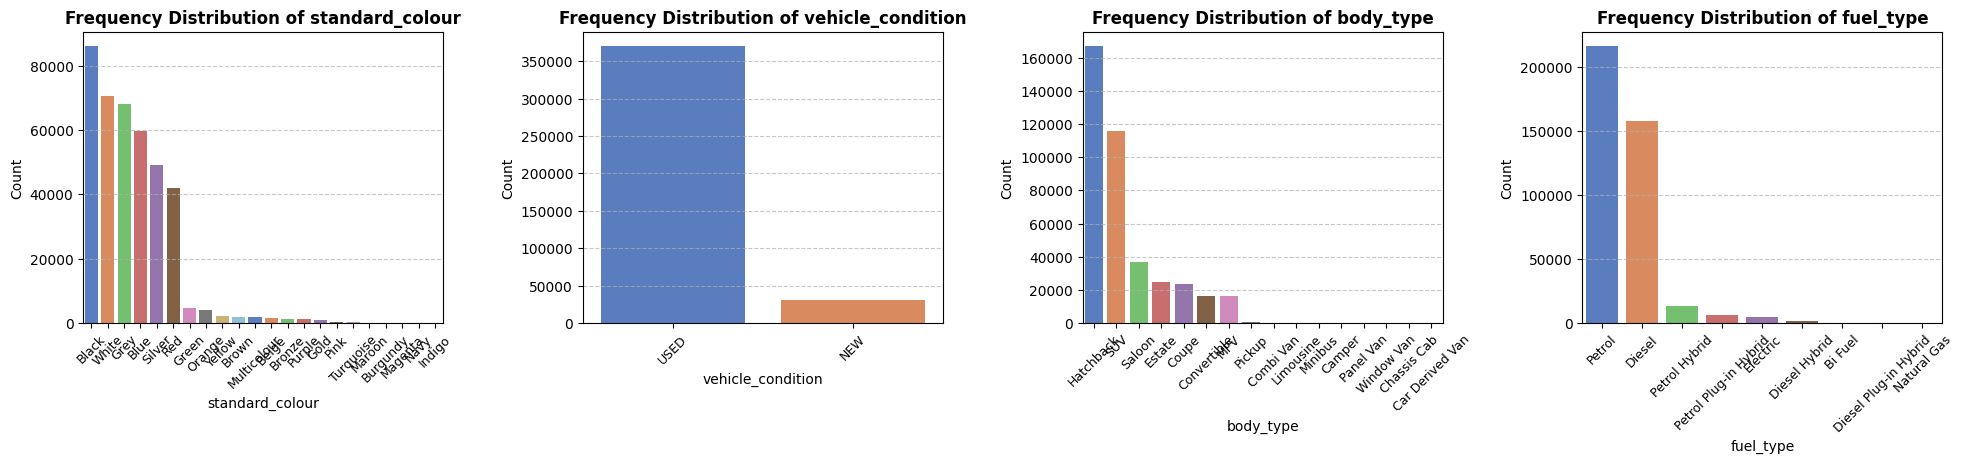

In [771]:
cols = 4
rows = 1
fig, axes = plt.subplots(rows, cols, figsize=(20, 5))

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, ax=axes[i], palette="muted")
    axes[i].set_title(f"Frequency Distribution of {feature}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].tick_params(axis="x", rotation=45, labelsize=9)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout(pad=2.0)
plt.show()

### Analysis of Predictive Power of Features (Finding the correlation)

##### Numeric Features

In [772]:
df.corr(numeric_only=True)

,public_reference,mileage,year_of_registration,price,crossover_car_and_van
public_reference,1.000000,0.034941,0.021617,-0.052344,-0.026169
mileage,0.034941,1.000000,-0.375541,-0.160204,0.033543
year_of_registration,0.021617,-0.375541,1.000000,0.102341,-0.011155
price,-0.052344,-0.160204,0.102341,1.000000,0.010402
crossover_car_and_van,-0.026169,0.033543,-0.011155,0.010402,1.000000


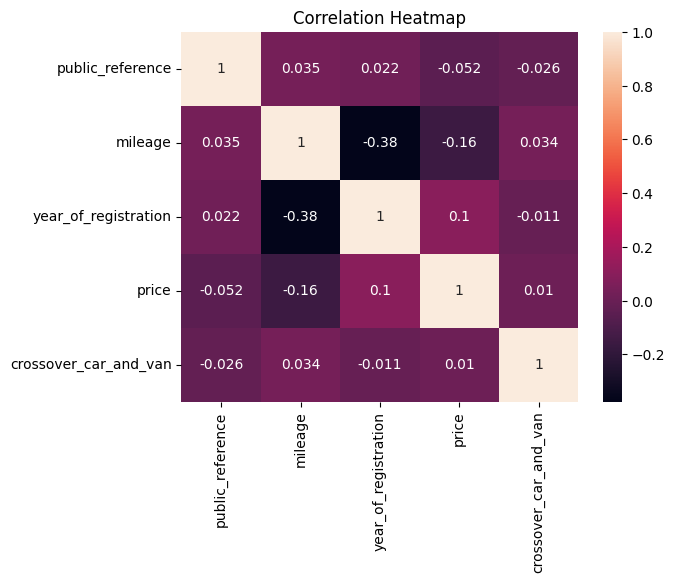

In [773]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()

##### Categorical Features

###### vehicle_condition feature

In [774]:
encoded_df = pd.get_dummies(df, columns=['vehicle_condition'], drop_first=True)

In [775]:
encoded_df['vehicle_condition_USED'].corr(encoded_df['price'])

-0.09692978931023286

### Data Exploration and Visualizations

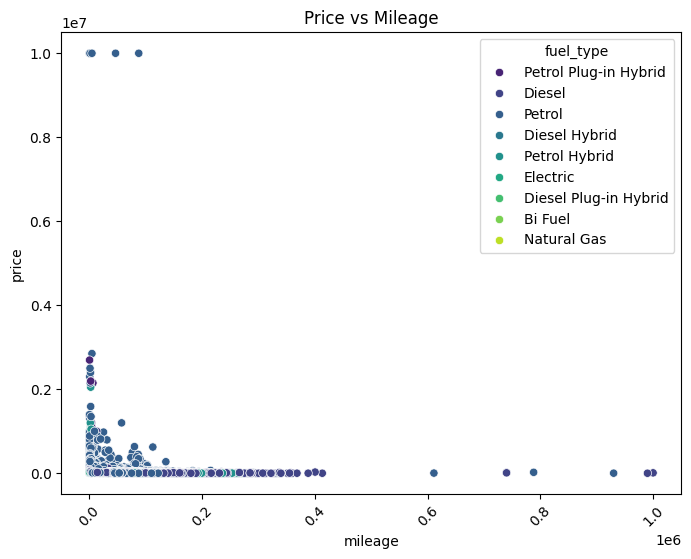

In [776]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='mileage', y='price', hue='fuel_type', palette='viridis')
plt.title('Price vs Mileage')
plt.xticks(rotation=45)
plt.show()

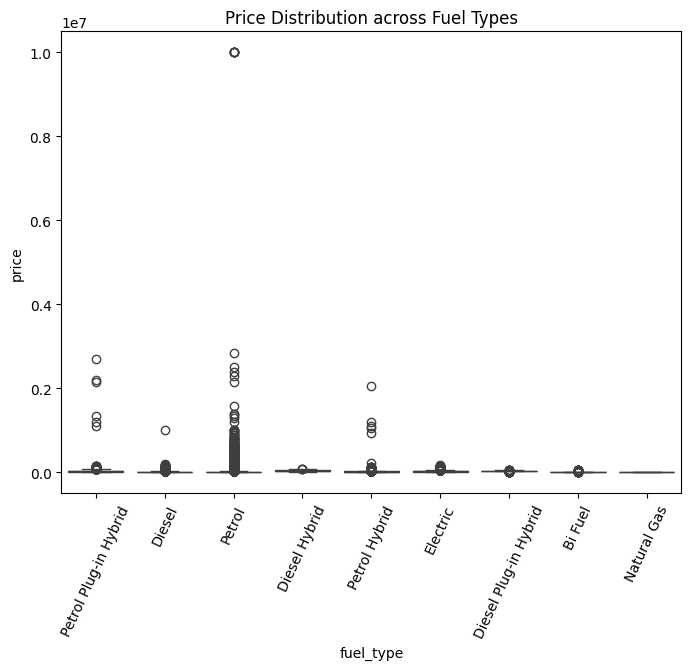

In [777]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='fuel_type', y='price')
plt.title('Price Distribution across Fuel Types')
plt.xticks(rotation=65)
plt.show()

## **2. Data Processing for Machine Learning Models**

### Dealing with Missing values

In [778]:
missing_values = pd.DataFrame(columns=['Columns', 'Unique Values', 'Missing Values'])

for i, col in enumerate(df.columns):
    missing_values.loc[i] = [col, df[col].nunique(), df[col].isnull().sum()]

print(missing_values)

                  Columns  Unique Values  Missing Values
0        public_reference         402005               0
1                 mileage          80634             127
2                reg_code             72           31857
3         standard_colour             22            5378
4           standard_make            110               0
5          standard_model           1168               0
6       vehicle_condition              2               0
7    year_of_registration             84           33311
8                   price          30578               0
9               body_type             16             837
10  crossover_car_and_van              2               0
11              fuel_type              9             601


In [779]:
(df.query("vehicle_condition == 'NEW'")).count()

# We can see that there is a pattern in missing values which are in column reg_code, year_of_registration FOR 'NEW' cars

,0
public_reference,31249
mileage,31249
reg_code,0
standard_colour,30209
standard_make,31249
standard_model,31249
vehicle_condition,31249
year_of_registration,0
price,31249
body_type,31193


In [780]:
# After researching, we get to know that the reg_code and year_of_registration are highly correlated
# Therefore, we can impute in any of one column and drop the other
# Filling the missing values for reg_code as '21' and year_of_registration as '2021' for 'NEW' cars.(This is an assumption)

# Filling missing values for 'year_of_registration' as 2021 for new cars
df.loc[(df['vehicle_condition'] == 'NEW') & (df['year_of_registration'].isnull()),'year_of_registration'] = 2021

# Filling missing values for 'reg_code' as 21 for new cars
df.loc[(df['vehicle_condition'] == 'NEW') & (df['reg_code'].isnull()),'reg_code'] = 21


In [781]:
(df.query("vehicle_condition == 'NEW'")).count()

,0
public_reference,31249
mileage,31249
reg_code,31249
standard_colour,30209
standard_make,31249
standard_model,31249
vehicle_condition,31249
year_of_registration,31249
price,31249
body_type,31193


In [782]:
def mapping_year_to_code(reg_code):
  try:
    reg_code_as_int = int(reg_code)
    if reg_code_as_int < 50:
      return 2000 + reg_code_as_int
    else:
      return 1950 + reg_code_as_int
  except ValueError:
    return None

df['year_of_registration'] = df['year_of_registration'].fillna(df['reg_code'].apply(lambda x: mapping_year_to_code(x)))

In [783]:
df.isna().sum()

,0
public_reference,0
mileage,127
reg_code,608
standard_colour,5378
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,371
price,0
body_type,837


In [784]:
# Here we are filling our values with the help of: https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom

old_car_reg_code_mapping={'A': 1963, 'B': 1964, 'C': 1965, 'D': 1966, 'E': 1967, 'F': 1968, 'G': 1969, 'H': 1970, 'J': 1971, 'K': 1972,
                   'L': 1973, 'M': 1973, 'N': 1974, 'P': 1975, 'R': 1976, 'S': 1977, 'T': 1978, 'V': 1979, 'W': 1980, 'X': 1981,
                  'Y': 1982}


df['year_of_registration'] = df['year_of_registration'].fillna(df['reg_code'].str.upper().map(old_car_reg_code_mapping))

In [785]:
df['year_of_registration'].isna().sum()

323

In [786]:
# Now as we are still getting missing values, there is no logic which we can apply to determine how to fill the values
# As it may be the noise of the data or incorrect values being provided to us.
# Therefore, we are going to drop our 323 null values in year_of_registration

df = df.dropna(subset=['year_of_registration'])

In [787]:
# Now we will be looking at standard_colour, fuel_type, body_type
# Simply fill the fuel_type, body_type by the mode of the dataset

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

In [788]:
df.isna().sum()

,0
public_reference,0
mileage,115
reg_code,287
standard_colour,5352
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,0
price,0
body_type,777


In [789]:
df[["body_type"]] = imputer.fit_transform(df[["body_type"]])

In [790]:
df[["fuel_type"]] = imputer.fit_transform(df[["fuel_type"]])

In [791]:
df.isna().sum()

,0
public_reference,0
mileage,115
reg_code,287
standard_colour,5352
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,0
price,0
body_type,0


In [792]:
# 'mileage' column imputing values.

In [793]:
# For 'NEW' cars
new_vehicle_missing_mileage = df[(df['vehicle_condition'] == 'NEW') & (df['mileage'].isnull())]

print(new_vehicle_missing_mileage.shape[0])

0


In [794]:
# For 'USED' cars
current_year = 2021
df["Age"]=(current_year - df["year_of_registration"])
df["Age"].unique()

mileage_not_na = df[(df['mileage'].notnull()) & (df['vehicle_condition'] == 'USED') & (df['mileage'] != 0) & (df['Age'] > 0)]  # Exclude rows with invalid Age

average_mileage_per_year = (mileage_not_na['mileage'] / mileage_not_na['Age']).mean()
print(f"Average mileage per year: {average_mileage_per_year:.2f}")

# Fill missing mileage based on the average mileage per year and age
df.loc[df['mileage'].isnull(), 'mileage'] = (df['Age'] * average_mileage_per_year)

Average mileage per year: 6646.16


In [795]:
df[(df['vehicle_condition'] =='USED')&(df['mileage'] == 0)]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,Age
810,202009254208702,0.0,70,Grey,Land Rover,Range Rover Velar,USED,2020.0,52995,SUV,False,Diesel,1.0
1656,202011015669636,0.0,13,Silver,Vauxhall,Insignia,USED,2013.0,2975,Hatchback,False,Diesel,8.0
1855,202010014447366,0.0,70,Grey,Mercedes-Benz,CLA Class,USED,2020.0,34995,Estate,False,Petrol,1.0
2201,202009304376426,0.0,70,Black,Land Rover,Range Rover,USED,2020.0,82750,SUV,False,Diesel,1.0
2754,202008283030532,0.0,63,Black,Audi,A1,USED,2013.0,8000,Hatchback,False,Diesel,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392399,202009153775246,0.0,70,NaN,Nissan,Micra,USED,2020.0,15495,Hatchback,False,Petrol,1.0
392484,202010034543274,0.0,70,Black,Audi,Q2,USED,2020.0,22300,SUV,False,Petrol,1.0
397265,202010225306510,0.0,70,Blue,SEAT,Arona,USED,2020.0,18648,SUV,False,Petrol,1.0
398534,202010094812357,0.0,70,White,Audi,E-Tron,USED,2020.0,80000,SUV,False,Electric,1.0


In [796]:
df.loc[(df['mileage'] == 0) & (df['vehicle_condition'] == 'USED') ,'mileage']=df['Age']*average_mileage_per_year
#for 355 vehicle the vehicle_condition is used and the mileage is 0, for those vehicles imputing the mileage with average mileage per year* its age

In [797]:
df.isna().sum()

,0
public_reference,0
mileage,0
reg_code,287
standard_colour,5352
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,0
price,0
body_type,0


In [798]:
# Dropping the reg_code & public_reference columns
df = df.drop(['reg_code', 'public_reference'], axis=1)

### Outliers

In [799]:
# Removing the outliers
first_car = 1892
curr_year = 2021

df = df[(df['year_of_registration'] >= first_car) & (df['year_of_registration'] <= curr_year)]

In [800]:
df.isna().sum()

,0
mileage,0
standard_colour,5352
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,0
price,0
body_type,0
crossover_car_and_van,0
fuel_type,0


### Feature Engineering

###### New Feature: 'model_name' = standard_make + standard_model

In [801]:
df['model_name'] = df['standard_make'] + ' ' + df['standard_model']
df['model_name']

,model_name
0,Volvo XC90
1,Jaguar XF
2,SKODA Yeti
3,Vauxhall Mokka
4,Land Rover Range Rover Sport
...,...
402000,Peugeot 208
402001,Peugeot 107
402002,Nissan Qashqai
402003,Abarth 595


###### standard_colour: With the groupby of model_name, I have found the most frequent colour of that car and filled the missing values with the most frequent one, then just keeping the colours count which are greater than 2000 (the rest are replaced by 'Other'). Logic behind this: Most cars are of that colour while manufacturing or that colour is the most sold.

In [802]:
df['standard_colour'].isnull().sum()

5352

In [803]:
df.groupby('model_name')['standard_colour']

In [804]:
mode_colours = df.groupby('model_name')['standard_colour'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Replace only missing values in 'standard_colour' with the most frequent colour for each 'make_model'
df['standard_colour'] = df['standard_colour'].fillna(df['model_name'].map(mode_colours))

print(df[['model_name', 'standard_colour']].head())

                     model_name standard_colour
0                    Volvo XC90            Grey
1                     Jaguar XF            Blue
2                    SKODA Yeti            Grey
3                Vauxhall Mokka           Brown
4  Land Rover Range Rover Sport            Grey


In [805]:
df['standard_colour'].isnull().sum()

24

In [806]:
df['standard_colour'] = df['standard_colour'].fillna('Others')

In [807]:
df['standard_colour'].value_counts()

,count
standard_colour,
Black,88317
White,71303
Grey,68969
Blue,60281
Silver,49979
Red,42302
Green,4548
Orange,4086
Yellow,2095


In [808]:
colour_count = df['standard_colour'].value_counts()

df['standard_colour'] = df['standard_colour'].apply(lambda x: 'Other' if colour_count[x] < 2000 else x)

In [809]:
df['standard_colour'].value_counts()

,count
standard_colour,
Black,88317
White,71303
Grey,68969
Blue,60281
Silver,49979
Red,42302
Other,7765
Green,4548
Orange,4086


In [810]:
df.isnull().sum()

,0
mileage,0
standard_colour,0
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,0
price,0
body_type,0
crossover_car_and_van,0
fuel_type,0


In [811]:
df['average_mileage_per_year'] = df['mileage'] / df['Age'].replace(0,1)

In [812]:
df['average_mileage_per_year']

,average_mileage_per_year
0,0.000000
1,10823.000000
2,1950.000000
3,9000.000000
4,10666.666667
...,...
402000,2589.500000
402001,9166.666667
402002,5862.222222
402003,1708.333333


### Data Transformation

In [813]:
df.columns

Index(['mileage', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'year_of_registration', 'price', 'body_type',
       'crossover_car_and_van', 'fuel_type', 'Age', 'model_name',
       'average_mileage_per_year'],
      dtype='object')

In [814]:
categorical_features = ['standard_colour','standard_make', 'body_type', 'model_name', 'fuel_type']

In [815]:
# Target encoding for categorical_features
for feature in categorical_features:
    target_mean = df.groupby(feature)['price'].mean()

    df[feature] = df[feature].map(target_mean)

In [816]:
df.isna().sum()

,0
mileage,0
standard_colour,0
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,0
price,0
body_type,0
crossover_car_and_van,0
fuel_type,0


In [817]:
vehicle_condition_df = pd.get_dummies(df['vehicle_condition'], drop_first=True)

In [818]:
vehicle_condition_df.isna().sum()

,0
USED,0


In [819]:
df = pd.concat([df, vehicle_condition_df], axis=1)

df.drop(columns=['vehicle_condition'], inplace=True)

In [820]:
df['USED'] = df['USED'].astype(int)

In [821]:
df.isna().sum()

,0
mileage,0
standard_colour,0
standard_make,0
standard_model,0
year_of_registration,0
price,0
body_type,0
crossover_car_and_van,0
fuel_type,0
Age,0


In [822]:
df1 = df.drop(columns=['standard_model','crossover_car_and_van','year_of_registration','USED'])

In [823]:
df1

,mileage,standard_colour,standard_make,price,body_type,fuel_type,Age,model_name,average_mileage_per_year
0,0.0,19849.548812,24999.204914,73970,22470.201207,35554.958760,0.0,40066.905105,0.000000
1,108230.0,16662.056635,26413.696201,7000,19313.665438,16504.094129,10.0,16111.920431,10823.000000
2,7800.0,19849.548812,13673.003017,14000,22470.201207,16423.220914,4.0,10570.696233,1950.000000
3,45000.0,13282.277695,8178.465180,7995,10600.354535,16504.094129,5.0,7834.876609,9000.000000
4,64000.0,19849.548812,35669.580276,26995,22470.201207,16504.094129,6.0,42472.208621,10666.666667
...,...,...,...,...,...,...,...,...,...
402000,5179.0,19849.548812,9937.685990,10595,10600.354535,16423.220914,2.0,9350.591687,2589.500000
402001,110000.0,15043.595055,9937.685990,2000,10600.354535,16423.220914,12.0,2710.193256,9166.666667
402002,52760.0,16707.392620,11416.209411,7250,22470.201207,16423.220914,9.0,12785.946969,5862.222222
402003,10250.0,15043.595055,15463.889270,11490,10600.354535,16423.220914,6.0,16111.343902,1708.333333


In [824]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns
df1[numeric_columns] = scaler.fit_transform(df1[numeric_columns])

In [825]:
df1['USED'] = df['USED']

### Feature Selection

In [826]:
df1.columns

Index(['mileage', 'standard_colour', 'standard_make', 'price', 'body_type',
       'fuel_type', 'Age', 'model_name', 'average_mileage_per_year', 'USED'],
      dtype='object')

In [827]:
features_model = df1.drop(columns=['standard_make','average_mileage_per_year'])

In [828]:
features_model.columns

Index(['mileage', 'standard_colour', 'price', 'body_type', 'fuel_type', 'Age',
       'model_name', 'USED'],
      dtype='object')

In [829]:
features_model.isna().sum()

,0
mileage,0
standard_colour,0
price,0
body_type,0
fuel_type,0
Age,0
model_name,0
USED,0


In [830]:
features_model

,mileage,standard_colour,price,body_type,fuel_type,Age,model_name,USED
0,-1.083569,1.250838,2.239439,0.773360,5.562558,-1.217310,1.024636,0
1,2.022191,-0.234465,-0.400748,0.313200,-0.199980,1.002161,-0.047125,1
2,-0.859741,1.250838,-0.124784,0.773360,-0.224442,-0.329522,-0.295043,1
3,0.207747,-1.809370,-0.361522,-0.957028,-0.199980,-0.107575,-0.417446,1
4,0.752970,1.250838,0.387524,0.773360,-0.199980,0.114372,1.132250,1
...,...,...,...,...,...,...,...,...
402000,-0.934953,1.250838,-0.259021,-0.957028,-0.224442,-0.773416,-0.349632,1
402001,2.072983,-0.988634,-0.597865,-0.957028,-0.224442,1.446055,-0.646727,1
402002,0.430428,-0.213340,-0.390892,0.773360,-0.224442,0.780214,-0.195932,1
402003,-0.789436,-0.988634,-0.223737,-0.957028,-0.224442,0.114372,-0.047151,1


In [831]:
new_car_df = features_model.query("USED == 0")

In [832]:
new_car_df = new_car_df.drop(columns=['USED'])

In [833]:
used_car_df = features_model.query("USED == 1")

In [834]:
used_car_df = used_car_df.drop(columns=['USED'])

In [835]:
new_car_df

,mileage,standard_colour,price,body_type,fuel_type,Age,model_name
0,-1.083569,1.250838,2.239439,0.773360,5.562558,-1.21731,1.024636
17,-1.083426,0.803447,0.411178,0.773360,-0.199980,-1.21731,-0.053740
19,-1.083569,-0.213340,0.308874,0.773360,-0.224442,-1.21731,0.186869
37,-1.083569,-0.213340,-0.124823,-0.957028,-0.224442,-1.21731,-0.413177
44,-1.083569,-1.699482,0.091848,-0.957028,-0.224442,-1.21731,-0.329679
...,...,...,...,...,...,...,...
401860,-1.083282,-1.699482,0.584798,0.773360,-0.199980,-1.21731,0.442084
401890,-1.083426,-0.988634,1.212065,1.338275,-0.224442,-1.21731,0.011650
401902,-1.083282,-0.213340,0.704015,0.313200,-0.224442,-1.21731,-0.078446
401905,-1.083569,-0.988634,1.097145,0.773360,-0.224442,-1.21731,0.350708


In [836]:
used_car_df

,mileage,standard_colour,price,body_type,fuel_type,Age,model_name
1,2.022191,-0.234465,-0.400748,0.313200,-0.199980,1.002161,-0.047125
2,-0.859741,1.250838,-0.124784,0.773360,-0.224442,-0.329522,-0.295043
3,0.207747,-1.809370,-0.361522,-0.957028,-0.199980,-0.107575,-0.417446
4,0.752970,1.250838,0.387524,0.773360,-0.199980,0.114372,1.132250
5,-0.624434,-0.234465,0.466568,1.338275,-0.224442,-0.329522,0.458783
...,...,...,...,...,...,...,...
402000,-0.934953,1.250838,-0.259021,-0.957028,-0.224442,-0.773416,-0.349632
402001,2.072983,-0.988634,-0.597865,-0.957028,-0.224442,1.446055,-0.646727
402002,0.430428,-0.213340,-0.390892,0.773360,-0.224442,0.780214,-0.195932
402003,-0.789436,-0.988634,-0.223737,-0.957028,-0.224442,0.114372,-0.047151


## **3. Model Building**, **4. Model Evaluation and Analysis**

### Train Test split

##### For new cars

In [837]:
from sklearn.model_selection import train_test_split

In [838]:
new_car_X = new_car_df.drop(columns='price')
new_car_y = new_car_df['price']

In [839]:
new_car_X_train, new_car_X_test, new_car_y_train, new_car_y_test = train_test_split(new_car_X, new_car_y, test_size=0.2, random_state=42)

##### For used cars

In [840]:
used_car_X = used_car_df.drop(columns='price')
used_car_y = used_car_df['price']

In [841]:
used_car_X_train, used_car_X_test, used_car_y_train, used_car_y_test = train_test_split(used_car_X, used_car_y, test_size=0.2, random_state=42)

### Model Instantiation and configuration

##### Linear Regression for new cars  

In [842]:
from sklearn.linear_model import LinearRegression

In [843]:
lr = LinearRegression()

In [844]:
lr.fit(new_car_X_train, new_car_y_train)

LinearRegression()

In [845]:
lr.score(new_car_X_train, new_car_y_train)

0.7457303847636754

In [846]:
lr.score(new_car_X_test, new_car_y_test)

0.7213917474234877

In [847]:
from sklearn.metrics import r2_score

In [848]:
r2_score(new_car_y_test,lr.predict(new_car_X_test))

0.7213917474234877

##### Linear Regression for used cars

In [849]:
lr.fit(used_car_X_train, used_car_y_train)

LinearRegression()

In [850]:
lr.score(used_car_X_train, used_car_y_train)

0.8215324932794141

In [851]:
lr.score(used_car_X_test, used_car_y_test)

0.8548680051707462

##### KNN for new cars

In [852]:
from sklearn.neighbors import KNeighborsRegressor

In [853]:
knnr = KNeighborsRegressor(n_neighbors=5)

In [854]:
knnr.fit(new_car_X_train, new_car_y_train)

KNeighborsRegressor()

In [855]:
knnr.score(new_car_X_train, new_car_y_train)

0.938370183044934

In [856]:
knnr.score(new_car_X_test, new_car_y_test)

0.8919451838508135

##### KNN for used cars

In [857]:
knnr.fit(used_car_X_train, used_car_y_train)

KNeighborsRegressor()

In [858]:
knnr.score(used_car_X_train, used_car_y_train)

0.9127081700026936

In [859]:
knnr.score(used_car_X_test, used_car_y_test)

0.9076396988918132

##### Decision Tree for new cars

In [860]:
from sklearn.tree import DecisionTreeRegressor

In [861]:
dtr = DecisionTreeRegressor(max_depth=10)

In [862]:
dtr.fit(new_car_X_train, new_car_y_train)

DecisionTreeRegressor(max_depth=10)

In [863]:
dtr.score(new_car_X_train, new_car_y_train)

0.9356840395861747

In [864]:
dtr.score(new_car_X_test, new_car_y_test)

0.8985330529512896

##### Decision Tree on used cars

In [865]:
dtr.fit(used_car_X_train, used_car_y_train)

DecisionTreeRegressor(max_depth=10)

In [866]:
dtr.score(used_car_X_train, used_car_y_train)

0.9428427929652994

In [867]:
dtr.score(used_car_X_test, used_car_y_test)

0.7557918615773556

### Grid Search and Model Ranking and Selection with Decision Tree Regressor & KNN

In [868]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

In [869]:
# Custom scorer for GridSearchCV to include all metrics
def custom_scorer(estimator, X, y):
    predictions = estimator.predict(X)
    mae = mean_absolute_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r2 = r2_score(y, predictions)
    return {"MAE": -mae, "RMSE": -rmse, "R2": r2} 

# Function to evaluate all combinations
def evaluate_grid_results(grid_results):
    metrics = []
    for i in range(len(grid_results["params"])):
        mae = -grid_results["mean_test_MAE"][i]  
        rmse = -grid_results["mean_test_RMSE"][i]
        r2 = grid_results["mean_test_R2"][i]
        params = grid_results["params"][i]
        metrics.append({"Params": params, "MAE": mae, "RMSE": rmse, "R2": r2})
    return pd.DataFrame(metrics)

In [870]:
knn_param_grid = {
    "n_neighbors": [3, 5, 7],
    "metric": ["euclidean", "manhattan"]
}

In [871]:
knn = KNeighborsRegressor()
knn_grid = GridSearchCV(
    estimator=knn,
    param_grid=knn_param_grid,
    scoring={
        "MAE": make_scorer(mean_absolute_error, greater_is_better=False),
        "RMSE": make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False),
        "R2": make_scorer(r2_score)
    },
    refit="RMSE",
    cv=5,
    n_jobs=-1
)

In [872]:
dt_param_grid = {
    "max_depth": [10, 20, 30, 40],
    "min_samples_leaf": [1, 5, 10]
}

In [873]:
dt = DecisionTreeRegressor()
dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    scoring={
        "MAE": make_scorer(mean_absolute_error, greater_is_better=False),
        "RMSE": make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False),
        "R2": make_scorer(r2_score)
    },
    refit="RMSE",
    cv=5,
    n_jobs=-1
)

###### For new cars

In [874]:
knn_grid.fit(new_car_X_train, new_car_y_train)

knn_results_new_car = evaluate_grid_results(knn_grid.cv_results_)
print("KNN Results for new cars:\n", knn_results_new_car)

KNN Results for new cars:
                                       Params       MAE      RMSE        R2
0  {'metric': 'euclidean', 'n_neighbors': 3}  0.128911  0.230273  0.909703
1  {'metric': 'euclidean', 'n_neighbors': 5}  0.131033  0.234164  0.906676
2  {'metric': 'euclidean', 'n_neighbors': 7}  0.135740  0.241442  0.900845
3  {'metric': 'manhattan', 'n_neighbors': 3}  0.128391  0.228496  0.911034
4  {'metric': 'manhattan', 'n_neighbors': 5}  0.130555  0.232607  0.907871
5  {'metric': 'manhattan', 'n_neighbors': 7}  0.135244  0.239926  0.902076


In [875]:
best_params = knn_grid.best_params_
print("Best Parameters for KNN for new car:", best_params)

best_score = knn_grid.best_score_
print("Best Cross-Validation Score for new car:", best_score)

Best Parameters for KNN for new car: {'metric': 'manhattan', 'n_neighbors': 3}
Best Cross-Validation Score for new car: -0.22849618666175564


In [876]:
dt_grid.fit(new_car_X_train, new_car_y_train)

dt_results_new_car = evaluate_grid_results(dt_grid.cv_results_)
print("Decision Tree Results for new cars:\n", dt_results_new_car)

Decision Tree Results for new cars:
                                        Params       MAE      RMSE        R2
0    {'max_depth': 10, 'min_samples_leaf': 1}  0.127790  0.213677  0.922090
1    {'max_depth': 10, 'min_samples_leaf': 5}  0.128096  0.214381  0.921566
2   {'max_depth': 10, 'min_samples_leaf': 10}  0.130902  0.218504  0.918487
3    {'max_depth': 20, 'min_samples_leaf': 1}  0.114256  0.209939  0.924414
4    {'max_depth': 20, 'min_samples_leaf': 5}  0.112545  0.198737  0.932505
5   {'max_depth': 20, 'min_samples_leaf': 10}  0.116599  0.203200  0.929444
6    {'max_depth': 30, 'min_samples_leaf': 1}  0.114367  0.210493  0.924034
7    {'max_depth': 30, 'min_samples_leaf': 5}  0.112507  0.198552  0.932627
8   {'max_depth': 30, 'min_samples_leaf': 10}  0.116603  0.203204  0.929441
9    {'max_depth': 40, 'min_samples_leaf': 1}  0.114366  0.209899  0.924445
10   {'max_depth': 40, 'min_samples_leaf': 5}  0.112581  0.198780  0.932474
11  {'max_depth': 40, 'min_samples_leaf': 10}  0.11

In [877]:
best_params_dt = dt_grid.best_params_
print("Best Parameters for DT for new car:", best_params_dt)

best_score_dt = dt_grid.best_score_
print("Best Cross-Validation Score for new car:", best_score_dt)

Best Parameters for DT for new car: {'max_depth': 30, 'min_samples_leaf': 5}
Best Cross-Validation Score for new car: -0.1985516871425885


* We have, the best scores from GridSearchCV and the best R2_score from KNN on new car is 0.911034, whereas for Decision Tree on new car is 0.932574. Therefore, the model we can select for deployment will be of Decision Tree with 'max_depth': 30, 'min_samples_leaf': 5.  

In [878]:
best_model = dt_grid.best_estimator_

In [879]:
feature_importance = best_model.feature_importances_

In [880]:
features = new_car_X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance for Decision Tree:")
print(importance_df)

Feature Importance for Decision Tree:
           Feature  Importance
5       model_name    0.916840
2        body_type    0.039404
3        fuel_type    0.030736
1  standard_colour    0.006618
0          mileage    0.006401
4              Age    0.000000


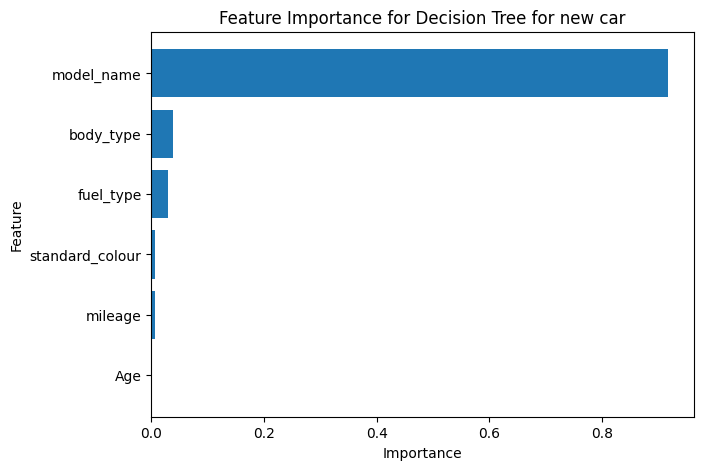

In [881]:
plt.figure(figsize=(7, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance for Decision Tree for new car')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###### For used cars

In [882]:
dt = DecisionTreeRegressor(random_state=42)
dt_grid_used_car = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    scoring={
        "MAE": make_scorer(mean_absolute_error, greater_is_better=False),
        "RMSE": make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False),
        "R2": make_scorer(r2_score)
    },
    refit="RMSE",
    cv=5,
    n_jobs=-1
)

In [883]:
knn_grid.fit(used_car_X_train, used_car_y_train)

knn_results_used_car = evaluate_grid_results(knn_grid.cv_results_)
print("KNN Results for used cars:\n", knn_results_used_car)

KNN Results for used cars:
                                       Params       MAE      RMSE        R2
0  {'metric': 'euclidean', 'n_neighbors': 3}  0.107114  0.381498  0.857294
1  {'metric': 'euclidean', 'n_neighbors': 5}  0.105995  0.376827  0.860046
2  {'metric': 'euclidean', 'n_neighbors': 7}  0.105831  0.375556  0.860412
3  {'metric': 'manhattan', 'n_neighbors': 3}  0.103694  0.379054  0.859301
4  {'metric': 'manhattan', 'n_neighbors': 5}  0.102208  0.368018  0.866645
5  {'metric': 'manhattan', 'n_neighbors': 7}  0.102194  0.369504  0.865351


In [884]:
best_params = knn_grid.best_params_
print("Best Parameters for KNN for used car:", best_params)

best_score = knn_grid.best_score_
print("Best Cross-Validation Score for used car:", best_score)

Best Parameters for KNN for used car: {'metric': 'manhattan', 'n_neighbors': 5}
Best Cross-Validation Score for used car: -0.36801798097097754


In [885]:
dt_grid_used_car.fit(used_car_X_train, used_car_y_train)

dt_results_used_car = evaluate_grid_results(dt_grid_used_car.cv_results_)
print("Decision Tree Results for used cars:\n", dt_results_used_car)

Decision Tree Results for used cars:
                                        Params       MAE      RMSE        R2
0    {'max_depth': 10, 'min_samples_leaf': 1}  0.115658  0.426549  0.820160
1    {'max_depth': 10, 'min_samples_leaf': 5}  0.115301  0.376621  0.859977
2   {'max_depth': 10, 'min_samples_leaf': 10}  0.115650  0.389324  0.847397
3    {'max_depth': 20, 'min_samples_leaf': 1}  0.088826  0.454613  0.795087
4    {'max_depth': 20, 'min_samples_leaf': 5}  0.084862  0.361936  0.870928
5   {'max_depth': 20, 'min_samples_leaf': 10}  0.085881  0.374029  0.859042
6    {'max_depth': 30, 'min_samples_leaf': 1}  0.098498  0.459266  0.793683
7    {'max_depth': 30, 'min_samples_leaf': 5}  0.086519  0.362823  0.870307
8   {'max_depth': 30, 'min_samples_leaf': 10}  0.086214  0.374166  0.858938
9    {'max_depth': 40, 'min_samples_leaf': 1}  0.098753  0.448451  0.802261
10   {'max_depth': 40, 'min_samples_leaf': 5}  0.086540  0.362917  0.870249
11  {'max_depth': 40, 'min_samples_leaf': 10}  0.0

In [886]:
best_params = dt_grid_used_car.best_params_
print("Best Parameters for DT for used car:", best_params)

# Best cross-validation score
best_score = dt_grid_used_car.best_score_
print("Best Cross-Validation Score for used car:", best_score)

Best Parameters for DT for used car: {'max_depth': 20, 'min_samples_leaf': 5}
Best Cross-Validation Score for used car: -0.36193626930714207


* We have, the best scores from GridSearchCV and the best R2_score from KNN on used car is 0.866645, whereas for Decision Tree on used car is 0.870928. Therefore, the model we can select for deployment will be of Decision Tree with 'max_depth': 20, 'min_samples_leaf': 5.

In [887]:
best_model = dt_grid_used_car.best_estimator_

In [888]:
features = new_car_X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance for Decision Tree:")
print(importance_df)

Feature Importance for Decision Tree:
           Feature  Importance
5       model_name    0.916840
2        body_type    0.039404
3        fuel_type    0.030736
1  standard_colour    0.006618
0          mileage    0.006401
4              Age    0.000000


In [889]:
feature_importance = best_model.feature_importances_

In [890]:
features = used_car_X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance for Decision Tree:")
print(importance_df)

Feature Importance for Decision Tree:
           Feature  Importance
5       model_name    0.871668
0          mileage    0.058653
4              Age    0.055781
2        body_type    0.005733
3        fuel_type    0.005638
1  standard_colour    0.002527


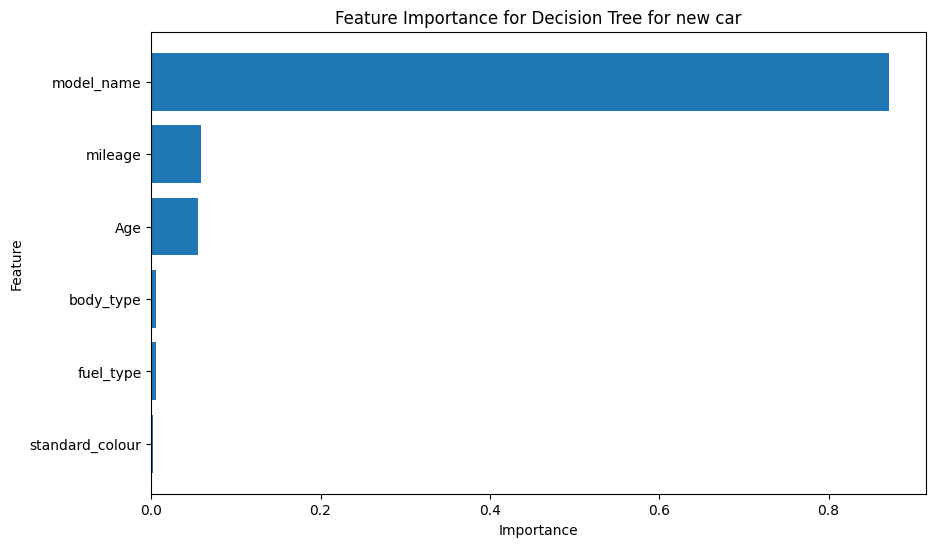

In [891]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance for Decision Tree for new car')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()